In [1]:
# ref: https://github.com/diode-meehai/WOE_IV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
sns.set(font_scale=1.15)
sns.set_style("whitegrid")

In [4]:
# Set the path to the CSV file
path = 'C:/Users/phong/OneDrive/Desktop/Data Science/credit_scoring_dataset.csv'

# Read the CSV file located at "path"
df = pd.read_csv(path)

print(df.shape)
df.head()

(32581, 12)


,customer_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,616d39c7-4cca-4e2e-a65c-848a9543cfe1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
1,49d00b80-f7ec-41ec-8063-8cc32f384268,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2
2,25172c7f-160a-44ac-b271-5833b7a679f6,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3
3,a8f721ac-9696-48b3-ae35-bc8b13592d26,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2
4,53be6c0c-0a33-41c1-a8d0-e9784b077f98,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 32581 non-null  object 
 1   person_age                  32581 non-null  int64  
 2   person_income               32581 non-null  int64  
 3   person_home_ownership       32581 non-null  object 
 4   person_emp_length           31686 non-null  float64
 5   loan_intent                 32581 non-null  object 
 6   loan_grade                  32581 non-null  object 
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   loan_status                 32581 non-null  int64  
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 3.0+ MB


In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218195,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413027,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,30.000000


C:\Users\phong\AppData\Local\Temp\ipykernel_5016\3009598145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['loan_status'] = np.where(df_target['loan_status']==1,'Bad','Good')


Good    25472
Bad      7109
Name: loan_status, dtype: int64
****************************************
Good    78.180535
Bad     21.819465
Name: loan_status, dtype: float64
****************************************


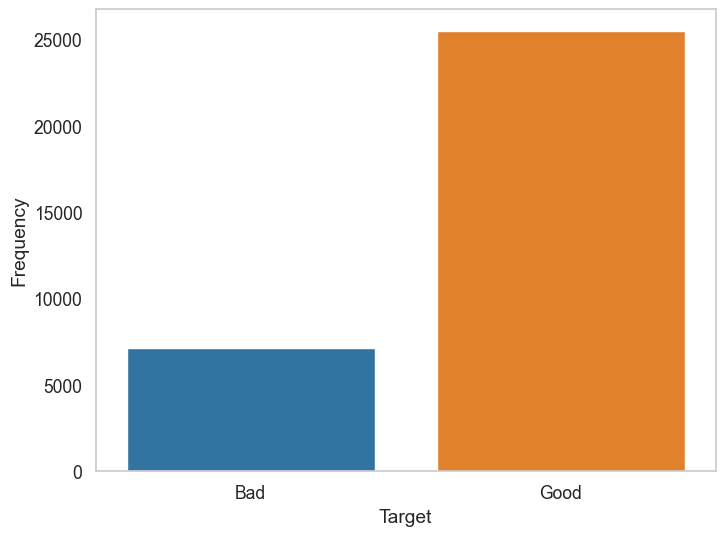

Imbalance Ratio (IR) = 1:3


In [7]:
## Univariate analysis (loan_status)

df_target = df[['loan_status']]
df_target['loan_status'] = np.where(df_target['loan_status']==1,'Bad','Good')

print(df_target['loan_status'].value_counts())
print('*'*40)
print(df_target['loan_status'].value_counts()/len(df_target)*100)
print('*'*40)

fig = plt.figure(figsize=(8,6))
sns.countplot(x='loan_status',data=df_target, palette='tab10')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.grid(False)
plt.show();

## IR = (negative_class/positive_class)
## Where positive_class is the number of minority class samples and negative_class is the number of majority class samples

count_good = len(df_target.loc[df_target['loan_status']=='Good'])
count_bad = len(df_target.loc[df_target['loan_status']=='Bad'])

print("Imbalance Ratio (IR) = 1:{}".format(int(count_good/count_bad)))

In [9]:


# loan_status : Good = 0
df_age = df[['loan_status', 'person_age']]


df_age['bin_person_age'] = pd.qcut(df_age['person_age'].astype(float), q=5, duplicates='drop', precision=0)

df_age

C:\Users\phong\AppData\Local\Temp\ipykernel_5016\171074289.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['bin_person_age'] = pd.qcut(df_age['person_age'].astype(float), q=5, duplicates='drop', precision=0)


,loan_status,person_age,bin_person_age
0,1,22,"(19.0, 23.0]"
1,0,21,"(19.0, 23.0]"
2,1,25,"(23.0, 25.0]"
3,1,23,"(19.0, 23.0]"
4,1,24,"(23.0, 25.0]"
...,...,...,...
32576,0,57,"(32.0, 144.0]"
32577,0,54,"(32.0, 144.0]"
32578,1,65,"(32.0, 144.0]"
32579,0,56,"(32.0, 144.0]"


In [10]:
df_age[:20]

,loan_status,person_age,bin_person_age
0,1,22,"(19.0, 23.0]"
1,0,21,"(19.0, 23.0]"
2,1,25,"(23.0, 25.0]"
3,1,23,"(19.0, 23.0]"
4,1,24,"(23.0, 25.0]"
5,1,21,"(19.0, 23.0]"
6,1,26,"(25.0, 27.0]"
7,1,24,"(23.0, 25.0]"
8,1,24,"(23.0, 25.0]"
9,1,21,"(19.0, 23.0]"


In [11]:
df_age = df[['loan_status', 'person_age']]
df_age['bin_person_age'] = pd.qcut(df_age['person_age'].astype(float), q=5, duplicates='drop', precision=0) # 5 age periods of people

#Include tables bin_person_age กับ loan_status (count, sum)
df_age = df_age.groupby('bin_person_age').agg({'loan_status': ['count', 'sum']}) 
df_age.columns = df_age.columns.map('_'.join) # Bind columns together in one line.

df_age['dist'] = df_age['loan_status_count']/df_age['loan_status_count'].sum() # Sum all = 1 # distribution mean
df_age['bad_rate'] = df_age['loan_status_sum']/df_age['loan_status_count'] # bad_rate Debt default rate
df_age = df_age.reset_index()
df_age

C:\Users\phong\AppData\Local\Temp\ipykernel_5016\2718327114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['bin_person_age'] = pd.qcut(df_age['person_age'].astype(float), q=5, duplicates='drop', precision=0) # อายุคนจำนวน 5 ช่วง


,bin_person_age,loan_status_count,loan_status_sum,dist,bad_rate
0,"(19.0, 23.0]",8766,2092,0.269053,0.238649
1,"(23.0, 25.0]",6586,1444,0.202142,0.219253
2,"(25.0, 27.0]",4615,961,0.141647,0.208234
3,"(27.0, 32.0]",6963,1445,0.213714,0.207525
4,"(32.0, 144.0]",5651,1167,0.173445,0.206512


In [12]:
df_age['loan_status_count'].sum()

32581

In [13]:
df_age['loan_status_count']

0    8766
1    6586
2    4615
3    6963
4    5651
Name: loan_status_count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


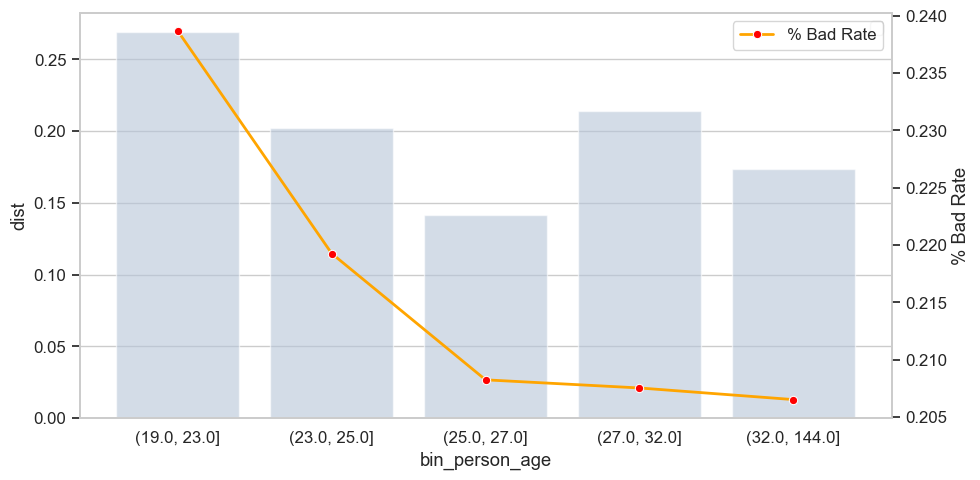

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))

### Second figure is bar plot + line chart ###

### y axis (left) is bar plot ###
sns.barplot(x='bin_person_age', y='dist', data=df_age, color='lightsteelblue', alpha=0.6, ax=ax)

### y axis (right) is line chart ###
ax2 = ax.twinx()
sns.lineplot(data=df_age, x=df_age.index, y='bad_rate', marker='o',
             markerfacecolor='red', markersize=6, color='orange',
             linewidth=2, label='% Bad Rate')

for x, y in zip(df_age.index, df_age['bad_rate'] * 100):
    label = "{:.2f}".format(y)
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center', color='black')

ax.legend()
ax2.grid(False)
ax2.set_ylabel('% Bad Rate')
plt.tight_layout()
plt.show()

# DSR (Debt Service Ratio)

In [17]:
df['dsr'] = df['loan_amnt']/df['person_income']

In [19]:
df['dsr']

0        0.593220
1        0.104167
2        0.572917
3        0.534351
4        0.643382
           ...   
32576    0.109434
32577    0.146875
32578    0.460526
32579    0.100000
32580    0.154167
Name: dsr, Length: 32581, dtype: float64

C:\Users\phong\AppData\Local\Temp\ipykernel_5016\1898394141.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['dsr'], kde=False)


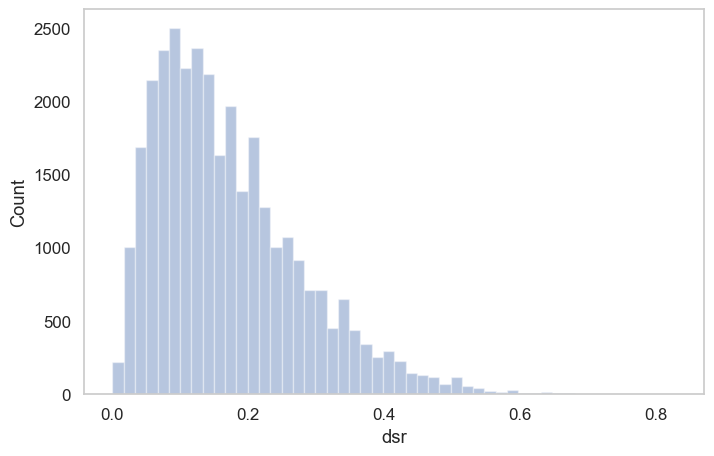

In [20]:
plt.subplots(figsize=(8,5))
sns.distplot(df['dsr'], kde=False)
plt.grid(False)
plt.ylabel('Count')
plt.show()

In [21]:
df.loc[df['dsr']>0.8]

,customer_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,dsr
640,0ab3438d-8c0f-4fb2-a394-388e88a2835a,22,20000,MORTGAGE,0.0,PERSONAL,B,16600,9.76,1,N,3,0.83


In [22]:
df_dsr = df[['loan_status', 'dsr']]
df_dsr['bin_dsr'] = pd.qcut(df_dsr['dsr'].astype(float), q=5, duplicates='drop', precision=0) 
df_dsr = df_dsr.groupby('bin_dsr').agg({'loan_status': ['count', 'sum']}) # sum = bad = 1
df_dsr.columns = df_dsr.columns.map('_'.join)
df_dsr['dist'] = df_dsr['loan_status_count']/df_dsr['loan_status_count'].sum() # Sum all = 1 # distribution mean
df_dsr['bad_rate'] = df_dsr['loan_status_sum']/df_dsr['loan_status_count'] 
df_dsr = df_dsr.reset_index()
df_dsr

C:\Users\phong\AppData\Local\Temp\ipykernel_5016\154624221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dsr['bin_dsr'] = pd.qcut(df_dsr['dsr'].astype(float), q=5, duplicates='drop', precision=0) # dsr จำนวน 5 ช่วง (Binning)


,bin_dsr,loan_status_count,loan_status_sum,dist,bad_rate
0,"(-0.09920000000000001, 0.08]",6524,694,0.200239,0.106376
1,"(0.08, 0.1]",6510,818,0.199810,0.125653
2,"(0.1, 0.2]",6515,956,0.199963,0.146738
3,"(0.2, 0.3]",6517,1233,0.200025,0.189197
4,"(0.3, 0.8]",6515,3408,0.199963,0.523101


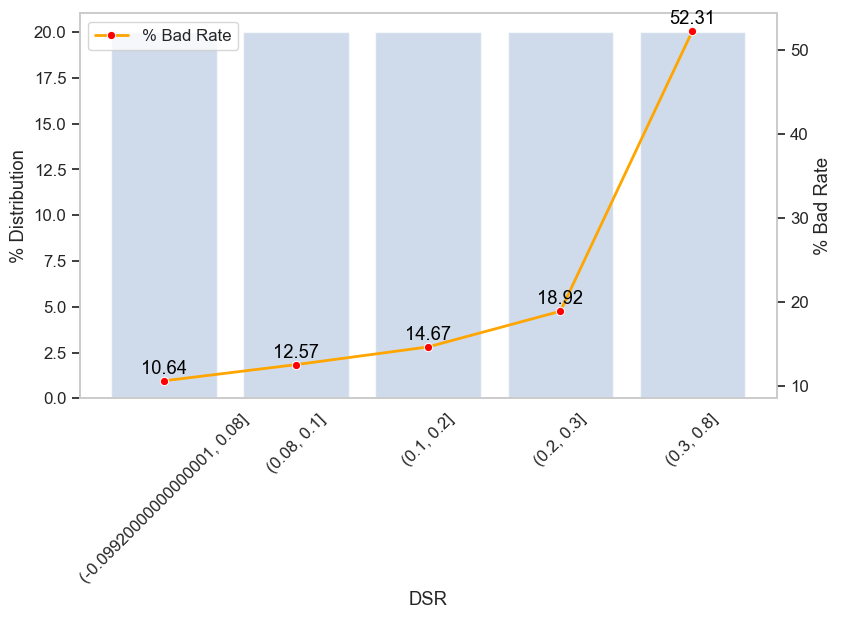

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

x1 = df_dsr['bin_dsr'].astype(str)
x2 = df_dsr.index
y1 = df_dsr['dist'] * 100
y2 = df_dsr['bad_rate'] * 100

sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(9, 5))
plt.tick_params(axis='x', rotation=45)

ax1.bar(x1, y1, color='lightsteelblue', alpha=0.6)
ax1.xaxis.grid()
ax2 = ax1.twinx()
sns.lineplot(x=x2, y=y2, data=df_dsr, marker='o',
            markerfacecolor='red', markersize=6, color='orange',
            linewidth=2, label='% Bad Rate')
ax1.set_xlabel('DSR')
ax1.set_ylabel('% Distribution')
ax2.set_ylabel('% Bad Rate')
ax1.grid(False)
ax2.grid(False)

for x, y in zip(x2, y2):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center', color='black')

plt.show()


# Weight of Evidence (WOE) & Information Value (IV)

In [25]:
df

,customer_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,dsr
0,616d39c7-4cca-4e2e-a65c-848a9543cfe1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3,0.593220
1,49d00b80-f7ec-41ec-8063-8cc32f384268,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2,0.104167
2,25172c7f-160a-44ac-b271-5833b7a679f6,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3,0.572917
3,a8f721ac-9696-48b3-ae35-bc8b13592d26,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2,0.534351
4,53be6c0c-0a33-41c1-a8d0-e9784b077f98,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4,0.643382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,N,30,0.109434
32577,ece9693f-16c5-416b-bfa7-34eae7bdc4b3,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,N,19,0.146875
32578,1fcb6014-9aad-45be-ac2a-490cfc55c0e4,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,N,28,0.460526
32579,a3e63186-afb3-48cd-a0ca-dcb22825107d,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,N,26,0.100000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 32581 non-null  object 
 1   person_age                  32581 non-null  int64  
 2   person_income               32581 non-null  int64  
 3   person_home_ownership       32581 non-null  object 
 4   person_emp_length           31686 non-null  float64
 5   loan_intent                 32581 non-null  object 
 6   loan_grade                  32581 non-null  object 
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   loan_status                 32581 non-null  int64  
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
 12  dsr                         32581 non-null  float64
dtypes: float64(3), int64(5), object

In [27]:
def fill_missing(df):
    for col in df.columns:
        
        # Check object
        if  df[col].dtypes == np.object :
            print('object: ', df[col])
            df[col] = df[col].fillna(value='Unidentified')
            
        
        # Check number
        elif df[col].dtypes == np.number:
            print('number: ', df[col])
            df[col] = df[col].fillna(df[col].median()) 
            
            

    return df

In [28]:
df_clean = fill_missing(df)
df_clean.info()

object:  0        616d39c7-4cca-4e2e-a65c-848a9543cfe1
1        49d00b80-f7ec-41ec-8063-8cc32f384268
2        25172c7f-160a-44ac-b271-5833b7a679f6
3        a8f721ac-9696-48b3-ae35-bc8b13592d26
4        53be6c0c-0a33-41c1-a8d0-e9784b077f98
                         ...                 
32576    c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c
32577    ece9693f-16c5-416b-bfa7-34eae7bdc4b3
32578    1fcb6014-9aad-45be-ac2a-490cfc55c0e4
32579    a3e63186-afb3-48cd-a0ca-dcb22825107d
32580    5185b116-af1e-4951-b9f0-d9d1f0d79b3e
Name: customer_id, Length: 32581, dtype: object
object:  0            RENT
1             OWN
2        MORTGAGE
3            RENT
4            RENT
           ...   
32576    MORTGAGE
32577    MORTGAGE
32578        RENT
32579    MORTGAGE
32580        RENT
Name: person_home_ownership, Length: 32581, dtype: object
number:  0        123.0
1          5.0
2          1.0
3          4.0
4          8.0
         ...  
32576      1.0
32577      4.0
32578      3.0
32579      5.0
32580      2.

C:\Users\phong\AppData\Local\Temp\ipykernel_5016\3532157094.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if  df[col].dtypes == np.object :
C:\Users\phong\AppData\Local\Temp\ipykernel_5016\3532157094.py:11: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  elif df[col].dtypes == np.number:
C:\Users\phong\AppData\Local\Temp\ipykernel_5016\3532157094.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/

In [29]:
df_clean

,customer_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,dsr
0,616d39c7-4cca-4e2e-a65c-848a9543cfe1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3,0.593220
1,49d00b80-f7ec-41ec-8063-8cc32f384268,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2,0.104167
2,25172c7f-160a-44ac-b271-5833b7a679f6,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3,0.572917
3,a8f721ac-9696-48b3-ae35-bc8b13592d26,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2,0.534351
4,53be6c0c-0a33-41c1-a8d0-e9784b077f98,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4,0.643382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,N,30,0.109434
32577,ece9693f-16c5-416b-bfa7-34eae7bdc4b3,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,N,19,0.146875
32578,1fcb6014-9aad-45be-ac2a-490cfc55c0e4,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,N,28,0.460526
32579,a3e63186-afb3-48cd-a0ca-dcb22825107d,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,N,26,0.100000


In [30]:
def binning_numeric(df):
    
    
    for i in df._get_numeric_data().columns:
        
        # ยกเว้น loan_status
        if i == 'loan_status':
            continue
        else:
            print('df[i]: ', df[i])
            df[i] = pd.qcut(df[i].astype(float), q=5, duplicates='drop', precision=0).astype('object')
            print(df[i])
            print('-------------------')
    return df_clean

In [31]:
df_bin = binning_numeric(df_clean)
df_bin.info()

df[i]:  0        22
1        21
2        25
3        23
4        24
         ..
32576    57
32577    54
32578    65
32579    56
32580    66
Name: person_age, Length: 32581, dtype: int64
0         (19.0, 23.0]
1         (19.0, 23.0]
2         (23.0, 25.0]
3         (19.0, 23.0]
4         (23.0, 25.0]
             ...      
32576    (32.0, 144.0]
32577    (32.0, 144.0]
32578    (32.0, 144.0]
32579    (32.0, 144.0]
32580    (32.0, 144.0]
Name: person_age, Length: 32581, dtype: object
-------------------
df[i]:  0         59000
1          9600
2          9600
3         65500
4         54400
          ...  
32576     53000
32577    120000
32578     76000
32579    150000
32580     42000
Name: person_income, Length: 32581, dtype: int64
0          (49000.0, 63000.0]
1           (3999.0, 35000.0]
2           (3999.0, 35000.0]
3          (63000.0, 86000.0]
4          (49000.0, 63000.0]
                 ...         
32576      (49000.0, 63000.0]
32577    (86000.0, 6000000.0]
32578      (63000.0, 

In [33]:
df_woe = df_bin.copy()
df_woe.head()

,customer_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,dsr
0,616d39c7-4cca-4e2e-a65c-848a9543cfe1,"(19.0, 23.0]","(49000.0, 63000.0]",RENT,"(8.0, 123.0]",PERSONAL,D,"(14500.0, 35000.0]","(13.6, 23.2]",1,Y,"(1.0, 3.0]","(0.3, 0.8]"
1,49d00b80-f7ec-41ec-8063-8cc32f384268,"(19.0, 23.0]","(3999.0, 35000.0]",OWN,"(3.0, 5.0]",EDUCATION,B,"(499.0, 4400.0]","(10.6, 11.5]",0,N,"(1.0, 3.0]","(0.08, 0.1]"
2,25172c7f-160a-44ac-b271-5833b7a679f6,"(23.0, 25.0]","(3999.0, 35000.0]",MORTGAGE,"(-1.0, 1.0]",MEDICAL,C,"(4400.0, 6750.0]","(11.5, 13.6]",1,N,"(1.0, 3.0]","(0.3, 0.8]"
3,a8f721ac-9696-48b3-ae35-bc8b13592d26,"(19.0, 23.0]","(63000.0, 86000.0]",RENT,"(3.0, 5.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,N,"(1.0, 3.0]","(0.3, 0.8]"
4,53be6c0c-0a33-41c1-a8d0-e9784b077f98,"(23.0, 25.0]","(49000.0, 63000.0]",RENT,"(5.0, 8.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,Y,"(3.0, 4.0]","(0.3, 0.8]"


In [34]:
#  count_bad  count_good
d = pd.DataFrame(df_woe.groupby(['loan_grade']).size(), columns=['total'])

d['count_bad'] = df_woe.groupby(['loan_grade'])['loan_status'].sum()
d['count_good'] = d['total']-d['count_bad']

d

,total,count_bad,count_good
loan_grade,,,
A,10777,1073,9704
B,10451,1702,8749
C,6458,1339,5119
D,3626,2141,1485
E,964,621,343
F,241,170,71
G,64,63,1


In [35]:
# ดู  count_bad  count_good
d = pd.DataFrame(df_woe.groupby(['person_home_ownership']).size(), columns=['total'])

d['count_bad'] = df_woe.groupby(['person_home_ownership'])['loan_status'].sum()
d['count_good'] = d['total']-d['count_bad']

d

,total,count_bad,count_good
person_home_ownership,,,
MORTGAGE,13444,1691,11753
OTHER,107,33,74
OWN,2584,193,2391
RENT,16446,5192,11254


In [36]:
# ดู  count_bad  count_good
d = pd.DataFrame(df_woe.groupby(['person_age']).size(), columns=['total'])

d['count_bad'] = df_woe.groupby(['person_age'])['loan_status'].sum()
d['count_good'] = d['total']-d['count_bad']

d

,total,count_bad,count_good
person_age,,,
"(19.0, 23.0]",8766,2092,6674
"(23.0, 25.0]",6586,1444,5142
"(25.0, 27.0]",4615,961,3654
"(27.0, 32.0]",6963,1445,5518
"(32.0, 144.0]",5651,1167,4484


In [37]:
d = pd.DataFrame(df_woe.groupby(['person_age']).size(), columns=['total'])

d['count_bad'] = df_woe.groupby(['person_age'])['loan_status'].sum()
d['count_good'] = d['total']-d['count_bad']

d['dist_bad'] = d['count_bad']/d['count_bad'].sum() #dist_bad
d['dist_good'] = d['count_good']/d['count_good'].sum() #dist_good

# ============= woe =========== #
# WOE = ln [ (%Distribution ที่สนใจ : Bad) / (%Distribution ที่ไม่สนใจ : Good) ]
d['woe'] = np.log(d.dist_bad/d.dist_good) # woe
# ============= woe =========== #

# ============= iv =========== #
# iv = SUM [ [(%Distribution ที่สนใจ : Bad) - (%Distribution ที่ไม่สนใจ : Good)] x WOE ]

d["iv"] = (d.dist_bad-d.dist_good)*np.log(d.dist_bad/d.dist_good) # iv
# ============= iv =========== #

d = d.replace([np.inf, -np.inf], 0) # ดัก Error ค่าคำนวณไม่ได้
d = d.reset_index()

d

,person_age,total,count_bad,count_good,dist_bad,dist_good,woe,iv
0,"(19.0, 23.0]",8766,2092,6674,0.294275,0.262013,0.116119,0.003746
1,"(23.0, 25.0]",6586,1444,5142,0.203123,0.201869,0.006193,0.000008
2,"(25.0, 27.0]",4615,961,3654,0.135181,0.143452,-0.059385,0.000491
3,"(27.0, 32.0]",6963,1445,5518,0.203263,0.216630,-0.063688,0.000851
4,"(32.0, 144.0]",5651,1167,4484,0.164158,0.176036,-0.069861,0.000830


In [38]:
d['iv'].sum() # person_age

0.0059262581959489595

In [39]:
# person_age = woe 
woe_dict = d.groupby(['person_age'])['woe'].mean().to_dict()
woe_dict

{Interval(19.0, 23.0, closed='right'): 0.11611938858812067,
 Interval(23.0, 25.0, closed='right'): 0.006193154341563288,
 Interval(25.0, 27.0, closed='right'): -0.05938510525303306,
 Interval(27.0, 32.0, closed='right'): -0.06368793151607242,
 Interval(32.0, 144.0, closed='right'): -0.0698609291908682}

In [40]:
df_demo_woe = df_woe[['person_age']]
df_demo_woe['woe_person_age'] = df_demo_woe['person_age'].map(woe_dict)
df_demo_woe.sample(10) # สุ่มมา 10 ตัว

C:\Users\phong\AppData\Local\Temp\ipykernel_5016\3673289254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo_woe['woe_person_age'] = df_demo_woe['person_age'].map(woe_dict)


,person_age,woe_person_age
4612,"(23.0, 25.0]",0.006193
2343,"(19.0, 23.0]",0.116119
12510,"(23.0, 25.0]",0.006193
32257,"(32.0, 144.0]",-0.069861
4207,"(23.0, 25.0]",0.006193
9500,"(23.0, 25.0]",0.006193
11482,"(23.0, 25.0]",0.006193
10872,"(19.0, 23.0]",0.116119
7720,"(23.0, 25.0]",0.006193
24189,"(27.0, 32.0]",-0.063688


In [41]:
def woe_iv(df_woe):
    iv_dict = {}
    final_iv = {}

    for i in df_woe.select_dtypes(object).columns:

        ### Calculate WOE and IV ###
        d = pd.DataFrame(df_woe.groupby([i]).size(), columns=['total'])

        d['count_bad'] = df_woe.groupby([i])['loan_status'].sum()
        d['count_good'] = d['total']-d['count_bad']

        d['dist_bad'] = d['count_bad']/d['count_bad'].sum()
        d['dist_good'] = d['count_good']/d['count_good'].sum()

        d['woe'] = np.log(d.dist_bad/d.dist_good) # woe
        d["iv"] = (d.dist_bad-d.dist_good)*np.log(d.dist_bad/d.dist_good) # iv

        d = d.replace([np.inf, -np.inf], 0)
        d = d.reset_index()

        # --------------------- #

        ### Append dataframe in dictionary ###
        if i not in final_iv:
            final_iv[i] = []
        final_iv[i].append(d)

        ### Map WOE value ###
        woe_dict = d.groupby([i])['woe'].mean().to_dict()
        df_woe['woe_'+i] = df_woe[i].map(woe_dict)

        ### Calculate final IV of each feature and append in dictionary
        if i not in iv_dict:
            iv_dict[i] = []
        iv_dict[i].append(d['iv'].sum())

    ### Generate IV dataframe
    iv_df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=['IV'])
    iv_df.index.name = 'Feature'

    return final_iv, iv_df, df_woe

In [42]:
final_iv, IV, df_woe = woe_iv(df_woe)

C:\Users\phong\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\phong\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [43]:
df_woe

,customer_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,...,woe_person_income,woe_person_home_ownership,woe_person_emp_length,woe_loan_intent,woe_loan_grade,woe_loan_amnt,woe_loan_int_rate,woe_cb_person_default_on_file,woe_cb_person_cred_hist_length,woe_dsr
0,616d39c7-4cca-4e2e-a65c-848a9543cfe1,"(19.0, 23.0]","(49000.0, 63000.0]",RENT,"(8.0, 123.0]",PERSONAL,D,"(14500.0, 35000.0]","(13.6, 23.2]",1,...,-0.226904,0.502614,-0.323157,-0.115973,1.642076,0.472619,1.209506,0.778461,0.064186,1.368686
1,49d00b80-f7ec-41ec-8063-8cc32f384268,"(19.0, 23.0]","(3999.0, 35000.0]",OWN,"(3.0, 5.0]",EDUCATION,B,"(499.0, 4400.0]","(10.6, 11.5]",0,...,1.005497,-1.240559,-0.022117,-0.294121,-0.360917,-0.051501,-0.215255,-0.213465,0.064186,-0.663736
2,25172c7f-160a-44ac-b271-5833b7a679f6,"(23.0, 25.0]","(3999.0, 35000.0]",MORTGAGE,"(-1.0, 1.0]",MEDICAL,C,"(4400.0, 6750.0]","(11.5, 13.6]",1,...,1.005497,-0.662570,0.323545,0.266357,-0.064818,-0.288606,-0.117564,-0.213465,0.064186,1.368686
3,a8f721ac-9696-48b3-ae35-bc8b13592d26,"(19.0, 23.0]","(63000.0, 86000.0]",RENT,"(3.0, 5.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,...,-0.494039,0.502614,-0.022117,0.266357,-0.064818,0.472619,1.209506,-0.213465,0.064186,1.368686
4,53be6c0c-0a33-41c1-a8d0-e9784b077f98,"(23.0, 25.0]","(49000.0, 63000.0]",RENT,"(5.0, 8.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,...,-0.226904,0.502614,-0.225528,0.266357,-0.064818,0.472619,1.209506,0.778461,0.028656,1.368686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c,"(32.0, 144.0]","(49000.0, 63000.0]",MORTGAGE,"(-1.0, 1.0]",PERSONAL,C,"(4400.0, 6750.0]","(11.5, 13.6]",0,...,-0.226904,-0.662570,0.323545,-0.115973,-0.064818,-0.288606,-0.117564,-0.213465,-0.064118,-0.663736
32577,ece9693f-16c5-416b-bfa7-34eae7bdc4b3,"(32.0, 144.0]","(86000.0, 6000000.0]",MORTGAGE,"(3.0, 5.0]",PERSONAL,A,"(14500.0, 35000.0]","(5.300000000000001, 7.7]",0,...,-1.021295,-0.662570,-0.022117,-0.115973,-0.925861,0.472619,-1.057980,-0.213465,-0.064118,-0.484197
32578,1fcb6014-9aad-45be-ac2a-490cfc55c0e4,"(32.0, 144.0]","(63000.0, 86000.0]",RENT,"(1.0, 3.0]",HOMEIMPROVEMENT,B,"(14500.0, 35000.0]","(10.6, 11.5]",1,...,-0.494039,0.502614,0.070109,0.235577,-0.360917,0.472619,-0.215255,-0.213465,-0.064118,1.368686
32579,a3e63186-afb3-48cd-a0ca-dcb22825107d,"(32.0, 144.0]","(86000.0, 6000000.0]",MORTGAGE,"(3.0, 5.0]",PERSONAL,B,"(14500.0, 35000.0]","(10.6, 11.5]",0,...,-1.021295,-0.662570,-0.022117,-0.115973,-0.360917,0.472619,-0.215255,-0.213465,-0.064118,-0.663736


In [44]:
IV

,IV
Feature,
customer_id,0.000000
person_age,0.005926
person_income,0.462039
person_home_ownership,0.376710
person_emp_length,0.049930
loan_intent,0.095705
loan_grade,0.881539
loan_amnt,0.073652
loan_int_rate,0.590146


In [45]:
IV.sort_values(by='IV', ascending=False)

,IV
Feature,
loan_grade,0.881539
dsr,0.719621
loan_int_rate,0.590146
person_income,0.462039
person_home_ownership,0.376710
cb_person_default_on_file,0.163922
loan_intent,0.095705
loan_amnt,0.073652
person_emp_length,0.049930


In [46]:
def iv_group(df):
  
    if df['IV'] > 0.5:
        val = 'Suspicious'
    elif df['IV'] > 0.3 and df['IV'] <= 0.5 :
        val = 'Strong'
    elif df['IV'] > 0.1 and df['IV'] <= 0.3 :
        val = 'Medium'
    elif df['IV'] > 0.02 and df['IV'] <= 0.1 :
        val = 'Weak'
    else:
        val = 'Not useful'

    return val

IV['Predictive_Power'] = IV.apply(iv_group, axis=1)
IV.sort_values('IV',ascending=False)

,IV,Predictive_Power
Feature,,
loan_grade,0.881539,Suspicious
dsr,0.719621,Suspicious
loan_int_rate,0.590146,Suspicious
person_income,0.462039,Strong
person_home_ownership,0.376710,Strong
cb_person_default_on_file,0.163922,Medium
loan_intent,0.095705,Weak
loan_amnt,0.073652,Weak
person_emp_length,0.049930,Weak


In [47]:
final_iv['person_age']

[      person_age  total  count_bad  count_good  dist_bad  dist_good       woe  \
 0   (19.0, 23.0]   8766       2092        6674  0.294275   0.262013  0.116119   
 1   (23.0, 25.0]   6586       1444        5142  0.203123   0.201869  0.006193   
 2   (25.0, 27.0]   4615        961        3654  0.135181   0.143452 -0.059385   
 3   (27.0, 32.0]   6963       1445        5518  0.203263   0.216630 -0.063688   
 4  (32.0, 144.0]   5651       1167        4484  0.164158   0.176036 -0.069861   
 
          iv  
 0  0.003746  
 1  0.000008  
 2  0.000491  
 3  0.000851  
 4  0.000830  ]

In [48]:
df_woe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     32581 non-null  object 
 1   person_age                      32581 non-null  object 
 2   person_income                   32581 non-null  object 
 3   person_home_ownership           32581 non-null  object 
 4   person_emp_length               32581 non-null  object 
 5   loan_intent                     32581 non-null  object 
 6   loan_grade                      32581 non-null  object 
 7   loan_amnt                       32581 non-null  object 
 8   loan_int_rate                   32581 non-null  object 
 9   loan_status                     32581 non-null  int64  
 10  cb_person_default_on_file       32581 non-null  object 
 11  cb_person_cred_hist_length      32581 non-null  object 
 12  dsr                             

In [49]:
def iv_group(df):
  
    if df['IV'] > 0.5:
        val = 'Suspicious'
    elif df['IV'] > 0.3 and df['IV'] <= 0.5 :
        val = 'Strong'
    elif df['IV'] > 0.1 and df['IV'] <= 0.3 :
        val = 'Medium'
    elif df['IV'] > 0.02 and df['IV'] <= 0.1 :
        val = 'Weak'
    else:
        val = 'Not useful'

    return val

IV['Predictive_Power'] = IV.apply(iv_group, axis=1)
IV.sort_values('IV',ascending=False)

,IV,Predictive_Power
Feature,,
loan_grade,0.881539,Suspicious
dsr,0.719621,Suspicious
loan_int_rate,0.590146,Suspicious
person_income,0.462039,Strong
person_home_ownership,0.376710,Strong
cb_person_default_on_file,0.163922,Medium
loan_intent,0.095705,Weak
loan_amnt,0.073652,Weak
person_emp_length,0.049930,Weak
